In [1]:
# Common imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
from sklearn.linear_model import LinearRegression
import math

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
import os
import urllib
import shutil

def download_file(url, dir_path="data"):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        
    file_name = os.path.split(url)[-1]
    file_path = os.path.join(dir_path, file_name)
    
    with urllib.request.urlopen(url) as response, open(file_path, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
        
    return file_path

In [3]:
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler

In [57]:
download_file("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv")
adv_df = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
adv_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
adv_df.shape

(200, 5)

#### preprocessing

In [58]:
adv_df['log_tv'] = adv_df.TV.apply(lambda x: math.pow(x, 0.4))

#### train_test_split

In [6]:
adv_df_test = adv_df.sample(int(len(adv_df)*0.5))

# create transactions dataset for train
adv_train = adv_df[~adv_df.isin(adv_df_test)].copy()
print("Total transactions in train dataset: ", len(adv_train))

# create transactions dataset for test
adv_test = adv_df[adv_df.isin(adv_df_test)].copy()
print("Total transactions in test dataset: ", len(adv_test))

Total transactions in train dataset:  200
Total transactions in test dataset:  200


In [122]:
adv_df[~adv_df.isin(adv_df_test)].head(10)

,TV,radio,newspaper,sales,log_tv
0,230.1,37.8,69.2,22.1,8.805756
1,44.5,39.3,45.1,10.4,4.563983
2,NaN,NaN,NaN,NaN,NaN
3,151.5,41.3,58.5,18.5,7.450151
4,180.8,10.8,58.4,12.9,7.996121
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,120.2,19.6,11.6,13.2,6.791439
8,8.6,2.1,1.0,4.8,2.364827
9,NaN,NaN,NaN,NaN,NaN


In [53]:
from sklearn.model_selection import train_test_split

adv_train, adv_test = train_test_split(adv_df, test_size=0.5, random_state=42, shuffle=True)

print("Total transactions in train dataset: ", len(adv_train))
print("Total transactions in test dataset: ", len(adv_test))

Total transactions in train dataset:  100
Total transactions in test dataset:  100


#### modeling

In [54]:
three_x_lm = smf.ols('sales ~ log_tv + radio', adv_train).fit()


#расчет метрик
print("RSS:", np.sum(three_x_lm.resid ** 2))
print("RSE:", np.sqrt(np.sum(three_x_lm.resid ** 2)) / (adv_train.shape[0] - 2 - 1)))
print("R^2:", three_x_lm.rsquared)

RSS: 200.2349956038338
RSE: 1.4367596546375327
R^2: 0.9273049082016976


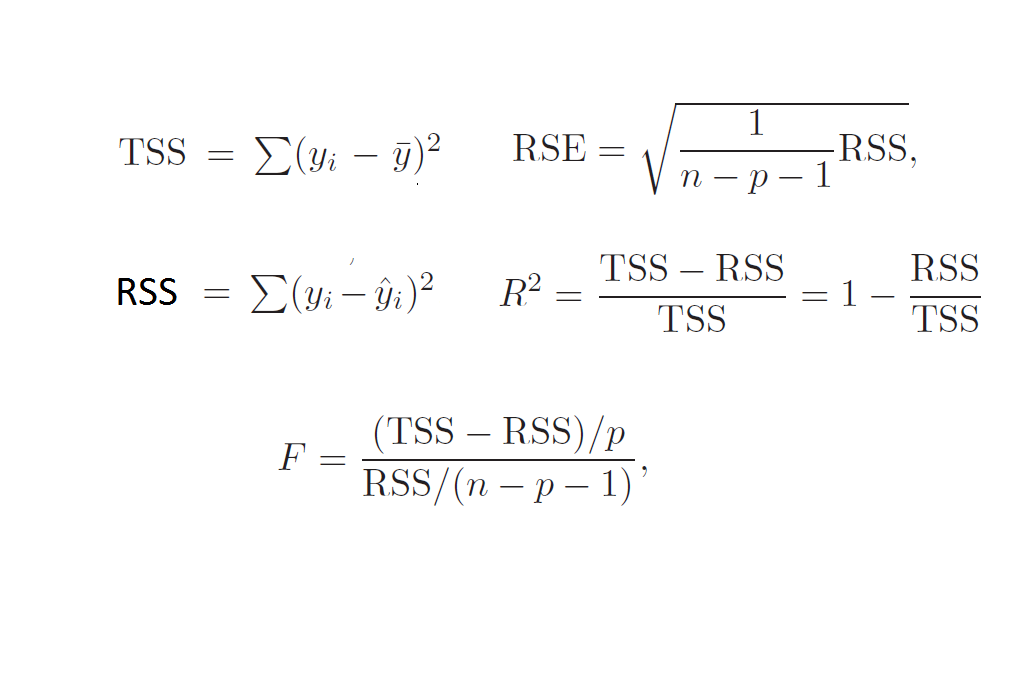

In [45]:
from IPython.display import Image
Image('2019_05_27_rss.png')

In [55]:
#получение предссказания на тесте
y_pred_test = three_x_lm.predict(adv_test[['log_tv', 'radio']])
y_test = adv_test['sales']

#рассчет метрик
TSS_test = np.sum((y_test - y_test.mean())**2)
RSS_test = np.sum((y_test - y_pred_test)**2)
RSE_test = np.sqrt(RSS_test / (adv_test.shape[0] - 2 - 1))
R_2_test = (1 - ss_res/ss_tot)

import sklearn
R_2_test2 = sklearn.metrics.r2_score(y_test, y_pred_test)

print("RSS_test:", RSS_test)
print("RSE_test:", RSE_test)
print("R^2_test:", R_2_test2)

RSS_test: 180.25270578707915
RSE_test: 1.3631857237341392
R^2_test: 0.9310741259261294


In [56]:
print("RSS:", np.sum(three_x_lm.resid ** 2))
print("RSE:", np.sqrt(rss / (adv_train.shape[0] - 2 - 1)))
print("R^2:", three_x_lm.rsquared)

RSS: 200.2349956038338
RSE: 1.4367596546375327
R^2: 0.9273049082016976


#### modeling v2

##### Модель sales ~ TV + radio + newspaper

In [67]:
adv_df.head()

,TV,radio,newspaper,sales,log_tv
0,230.1,37.8,69.2,22.1,8.805756
1,44.5,39.3,45.1,10.4,4.563983
2,17.2,45.9,69.3,9.3,3.120408
3,151.5,41.3,58.5,18.5,7.450151
4,180.8,10.8,58.4,12.9,7.996121


In [68]:
y = adv_df['sales']
df_1 = adv_df.drop(['log_tv','sales'], axis=1)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(df_1, y, test_size=0.5, shuffle=True, random_state=42)

lm = LinearRegression()
model = lm.fit(x_train, y_train)

In [70]:
print('R^2 score for test:', model.score(x_test, y_test))
print('R^2 score for train:', model.score(x_train, y_train))

R^2 score for test: 0.8721004816045136
R^2 score for train: 0.9042613648908892


### Feature selection - Ridge & Lasso

In [71]:
from sklearn.linear_model import Ridge

In [74]:
X_train, X_test, y_train, y_test = train_test_split(adv_train.drop(['sales'], axis = 1), adv_train['sales'],\
                                                    test_size=0.5, shuffle=True, random_state=42)

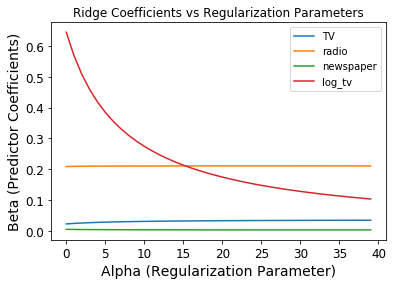

In [114]:
coef=[]
alphas = range(0,40)

for a in alphas:
    ridge_reg = Ridge(alpha=a)
    ridge_reg.fit(X_train, y_train)
    coef.append(ridge_reg.coef_)

###Make plot of Beta as a function of Alpha
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
ax.legend(labels=['TV','radio','newspaper','log_tv'])

/Users/k.gusev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


training data MSE
1.5947882613343078
test data MSE
3.2001185570406268
training data R-square
0.93641466252181
test data R-square
0.8962379470668648


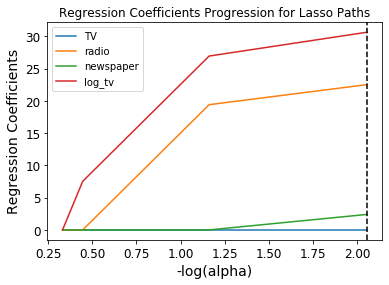

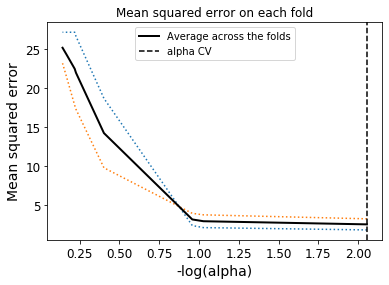

In [121]:
from sklearn.linear_model import LassoLarsCV
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(adv_train.drop(['sales'], axis = 1), adv_train['sales'],
                                                              test_size=.3, random_state=123)

# specify the lasso regression model
model=LassoLarsCV(cv=2, precompute=False).fit(pred_train,tar_train)

# print variable names and regression coefficients
dict(zip(adv_train.drop(['sales'], axis = 1).columns, model.coef_))

# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.legend(labels=['TV','radio','newspaper','log_tv'])

# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')


# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)